In [1]:
# Enabling print for all lines
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Checking the working directory
import os
os.getcwd()

'C:\\Users\\Administrator\\Python_work\\Edureka'

In [2]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers import Dense

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [3]:
# Read in white wine data 
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')
white.shape

# Read in red wine data 
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')
red.shape

(4898, 12)

(1599, 12)

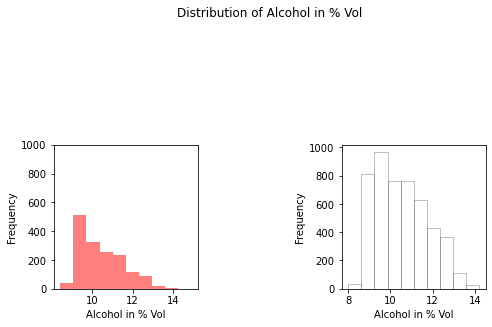

(array([  0,   7, 673, 452, 305, 133,  21,   8], dtype=int64), array([ 7,  8,  9, 10, 11, 12, 13, 14, 15]))
(array([   0,  317, 1606, 1256,  906,  675,  131,    7], dtype=int64), array([ 7,  8,  9, 10, 11, 12, 13, 14, 15]))


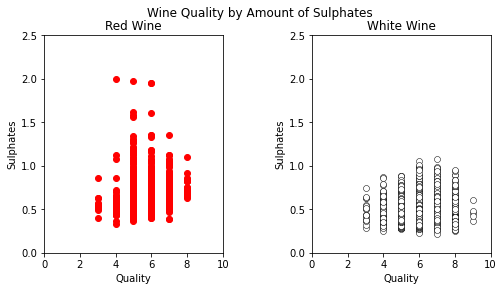

In [4]:
# Plotting the data
fig, ax = plt.subplots(1, 2)

ax[0].hist(red.alcohol, 10, facecolor='red', alpha=0.5, label="Red wine")
ax[1].hist(white.alcohol, 10, facecolor='white', ec="black", lw=0.5, alpha=0.5, label="White wine")

fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=1)
ax[0].set_ylim([0, 1000])

ax[0].set_xlabel("Alcohol in % Vol"), ax[0].set_ylabel("Frequency")
ax[1].set_xlabel("Alcohol in % Vol"), ax[1].set_ylabel("Frequency")
#ax[0].legend(loc='best'), ax[1].legend(loc='best')

fig.suptitle("Distribution of Alcohol in % Vol")
plt.show();

print(np.histogram(red.alcohol, bins=[7,8,9,10,11,12,13,14,15]))
print(np.histogram(white.alcohol, bins=[7,8,9,10,11,12,13,14,15]))

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].scatter(red['quality'], red["sulphates"], color="red")
ax[1].scatter(white['quality'], white['sulphates'], color="white", edgecolors="black", lw=0.5)

ax[0].set_title("Red Wine"), ax[1].set_title("White Wine")
ax[0].set_xlabel("Quality"), ax[1].set_xlabel("Quality")
ax[0].set_ylabel("Sulphates"), ax[1].set_ylabel("Sulphates")

ax[0].set_xlim([0,10]), ax[1].set_xlim([0,10])
ax[0].set_ylim([0,2.5]), ax[1].set_ylim([0,2.5])

fig.subplots_adjust(wspace=0.5)
fig.suptitle("Wine Quality by Amount of Sulphates")
plt.show();

In [5]:
# Add `type` column to `red` with value 1
red['type'] = 1
# Add `type` column to `white` with value 0
white['type'] = 0

# Append `white` to `red`
wines = red.append(white, ignore_index=True)

In [6]:
# Checking the wine data
wines.shape
wines.columns

(6497, 13)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

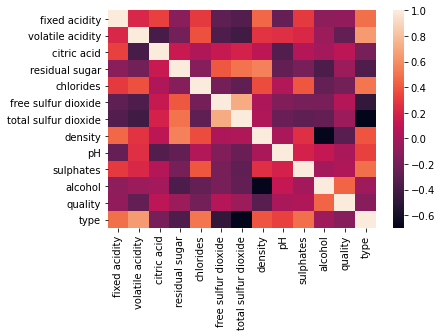

In [7]:
# Building the correlation plot
corr = wines.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values);

In [8]:
# Split the data into train and test for bilding the model

# Specify the data 
X=wines.iloc[:,0:11]

# Specify the target labels and flatten the array 
y=np.ravel(wines.type)

# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (4352, 11)
y_train shape (4352,)
X_test shape (2145, 11)
y_test shape (2145,)


In [9]:
# Scaling the train data before building the model

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

In [10]:
# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(12, activation='relu', input_shape=(11,)))

# Add one hidden layer 
model.add(Dense(8, activation='relu'))

# Add an output layer 
model.add(Dense(1, activation='sigmoid'))

# Model output shape
model.output_shape

# Model summary
model.summary()

(None, 1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                144       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Model config
model.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 11),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'batch_input_shape': (None, 11),
    'dtype': 'float32',
    'units': 12,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_1',
    'trainable': True,
    'dtype': 'float32',
    'units': 8,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initial

In [12]:
# List all weight tensors 
model.get_weights()

[array([[-0.44710854, -0.30395728, -0.07746944,  0.4503386 , -0.25470564,
          0.05733132, -0.42585546,  0.3117351 , -0.36872774,  0.28735316,
         -0.01536936,  0.04106337],
        [-0.01825112, -0.0433732 ,  0.4393465 , -0.33840948,  0.20065367,
          0.05276895, -0.43421957,  0.00854045, -0.31365556, -0.4260509 ,
         -0.05483156, -0.3009355 ],
        [-0.30180603, -0.4557447 ,  0.09894413,  0.473278  , -0.22538409,
          0.4556418 , -0.41621712, -0.27164173, -0.27899158, -0.49290794,
         -0.19280767,  0.32553768],
        [-0.48638052, -0.11948815,  0.35592377, -0.38751066, -0.12500009,
          0.4580887 ,  0.2993639 , -0.38990057,  0.48438197,  0.274033  ,
         -0.43799174, -0.4023642 ],
        [ 0.3629371 , -0.14030796, -0.08660877,  0.41329247, -0.10861295,
          0.2557345 ,  0.20386374, -0.38927478,  0.2873367 , -0.5093638 ,
          0.10937768, -0.0424163 ],
        [-0.27363795,  0.16411912, -0.17781496, -0.48818094, -0.084057  ,
      

In [13]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
# Fit the model on the training data
model.fit(X_train, y_train,epochs=20, batch_size=1, verbose=1)

Epoch 1/20
4352/4352 [==============================] - 3s 705us/step - loss: 0.0722 - accuracy: 0.9860
Epoch 2/20
4352/4352 [==============================] - 3s 704us/step - loss: 0.0278 - accuracy: 0.9949
Epoch 3/20
4352/4352 [==============================] - 3s 703us/step - loss: 0.0214 - accuracy: 0.9956
Epoch 4/20
4352/4352 [==============================] - 3s 709us/step - loss: 0.0188 - accuracy: 0.9959
Epoch 5/20
4352/4352 [==============================] - 3s 708us/step - loss: 0.0228 - accuracy: 0.9961
Epoch 6/20
4352/4352 [==============================] - 3s 704us/step - loss: 0.0187 - accuracy: 0.9968
Epoch 7/20
4352/4352 [==============================] - 3s 712us/step - loss: 0.0176 - accuracy: 0.9972
Epoch 8/20
4352/4352 [==============================] - 3s 710us/step - loss: 0.0149 - accuracy: 0.9975
Epoch 9/20
4352/4352 [==============================] - 3s 704us/step - loss: 0.0146 - accuracy: 0.9975
Epoch 10/20
4352/4352 [==============================] - 3s 732u

In [15]:
# Making predictions on the test data
y_pred = model.predict(X_test)

# Checking the prediction made by the model
y_test[:5]

array([0, 1, 0, 0, 0], dtype=int64)

In [16]:
# Scoring the prediction by conparing with the y_test data
score = model.evaluate(X_test, y_test,verbose=1)
print("Accuracy: ", round(score[1]*100,1))

68/68 [==============================] - 0s 706us/step - loss: 0.0270 - accuracy: 0.9953
Accuracy:  99.5
